# Analyzing global internet patterns

## 📖 Background
In this competition, you'll be exploring a dataset that highlights internet usage for different countries from 2000 to 2023. Your goal is import, clean, analyze and visualize the data in your preferred tool.

The end goal will be a clean, self explanatory, and interactive visualization. By conducting a thorough analysis, you'll dive deeper into how internet usage has changed over time and the countries still widely impacted by lack of internet availability. 


## 💾 Data

#### You have access to the following file, but you can supplement your data with other sources to enrich your analysis. 

### Interet Usage (`internet_usage.csv`)
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

**The data can be downloaded from the _Files_ section (_File_ > _Show workbook files_).**

## 💪 Challenge
Use a tool of your choice to create an interesting visual or dashboard that summarizes your analysis! 

Things to consider:
1. Use this Workspace to prepare your data (optional).
2. Stuck on where to start, here's some ideas to get you started: 
    - Visualize interner usage over time, by country 
    - How has internet usage changed over time, are there any patterns emerging? 
    - Consider bringing in other data to supplement your analysis 
3. Create a screenshot of your main dashboard / visuals, and paste in the designated field. 
4. Summarize your findings in an executive summary.

In [6]:
#Data Cleaning and Segmentation
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

data = pd.read_csv("data/internet_usage.csv")
data.drop(columns=['Country Code'], inplace=True)
data.replace('..', np.nan, inplace=True)

for i in range(2000, 2024):
    print(f'missing data in year {i}: {data[str(i)].isna().sum()}')

for country in data['Country Name'].unique():
    country_df = data[data['Country Name'] == country]
    df = country_df.melt(id_vars=['Country Name'], 
                         var_name='year', 
                         value_name='percentage_of_population_using_internet')
    df.drop(columns='Country Name', inplace=True)
    df["year"] = pd.to_numeric(df["year"], errors='coerce')
    df['percentage_of_population_using_internet'] = pd.to_numeric(df['percentage_of_population_using_internet'], errors='coerce')
    df["percentage_of_population_using_internet_data_source"] = df['percentage_of_population_using_internet'].apply(lambda x: "real data" if not pd.isna(x) else np.nan)
    
    valid_data = df[df['percentage_of_population_using_internet'].notna()]
    
    if len(valid_data) > 23:  # Using spline interpolation when there is few missing value
        spline = UnivariateSpline(valid_data['year'], valid_data['percentage_of_population_using_internet'], s=0)
        df['percentage_of_population_using_internet'] = spline(df['year'])
        method_used = "spline"
    elif len(valid_data) > 10:  # Using quadratic interpolation when there is moderate missing value as most of the data has polinomial pattern
        quadratic_interp = interp1d(valid_data['year'], valid_data['percentage_of_population_using_internet'], kind='quadratic', fill_value="extrapolate")
        df['percentage_of_population_using_internet'] = quadratic_interp(df['year'])
        method_used = "quadratic"
    elif len(valid_data) > 1:  # Using linear interpolation as fallback
        linear_interp = interp1d(valid_data['year'], valid_data['percentage_of_population_using_internet'], kind='linear', fill_value="extrapolate")
        df['percentage_of_population_using_internet'] = linear_interp(df['year'])
        method_used = "linear"
    else:
        print(f"Not enough data points for interpolation in {country}")
        method_used = "none"
    
    
    df["percentage_of_population_using_internet_data_source"] = np.where(df["percentage_of_population_using_internet_data_source"].isna(), "interpolated data", df["percentage_of_population_using_internet_data_source"])
    df["percentage_of_population_using_internet_data_source"] = np.where(df["percentage_of_population_using_internet_data_source"] == "interpolated data", r"interpolated/extrapolated data", df["percentage_of_population_using_internet_data_source"])
    df.to_csv(f'{country}.csv', index=False)
    print(f"Saved data for {country} to {country}.csv using {method_used} interpolation.")


missing data in year 2000: 21
missing data in year 2001: 18
missing data in year 2002: 15
missing data in year 2003: 21
missing data in year 2004: 18
missing data in year 2005: 17
missing data in year 2006: 18
missing data in year 2007: 13
missing data in year 2008: 15
missing data in year 2009: 15
missing data in year 2010: 16
missing data in year 2011: 13
missing data in year 2012: 15
missing data in year 2013: 16
missing data in year 2014: 16
missing data in year 2015: 17
missing data in year 2016: 14
missing data in year 2017: 11
missing data in year 2018: 41
missing data in year 2019: 31
missing data in year 2020: 25
missing data in year 2021: 27
missing data in year 2022: 34
missing data in year 2023: 158
Saved data for Afghanistan to Afghanistan.csv using quadratic interpolation.
Saved data for Albania to Albania.csv using spline interpolation.
Saved data for Algeria to Algeria.csv using quadratic interpolation.
Not enough data points for interpolation in American Samoa
Saved da

In [2]:
# import os
# import pandas as pd
# directory = os.getcwd()
# combined_data = pd.DataFrame()
# for file in os.listdir(directory):
#     if file.endswith(".csv") and file != "internet_usage_217_countries.csv":  
#         country_name = os.path.splitext(file)[0]  
#         country_data = pd.read_csv(os.path.join(directory, file))
#         country_data['Country Name'] = country_name 
#         combined_data = pd.concat([combined_data, country_data], ignore_index=True)
# combined_data['year']=combined_data['year'].astype('int')
# combined_data.to_csv(os.path.join(directory, "internet_usage_217_countries.csv"), index=False)

In [4]:
#Data Cleaning and Segmentation
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

data = pd.read_csv("gdp_per_capita.csv")
data.replace('..', np.nan, inplace=True)

for i in range(2000, 2024):
    print(f'missing data in year {i}: {data[str(i)].isna().sum()}')

for country in data['Country Name'].unique():
    country_df = data[data['Country Name'] == country]
    df = country_df.melt(id_vars=['Country Name'], 
                         var_name='year', 
                         value_name='gdp_per_capita')
    df.drop(columns='Country Name', inplace=True)
    df["year"] = pd.to_numeric(df["year"], errors='coerce')
    df['gdp_per_capita'] = pd.to_numeric(df['gdp_per_capita'], errors='coerce')
    df["gdp_per_capita_data_source"] = df['gdp_per_capita'].apply(lambda x: "real data" if not pd.isna(x) else np.nan)
    
    valid_data = df[df['gdp_per_capita'].notna()]
    
    if len(valid_data) > 23:  # Using spline interpolation when there is few missing value
        spline = UnivariateSpline(valid_data['year'], valid_data['gdp_per_capita'], s=0)
        df['gdp_per_capita'] = spline(df['year'])
        method_used = "spline"
    elif len(valid_data) > 10:  # Using quadratic interpolation when there is moderate missing value as most of the data has polinomial pattern
        quadratic_interp = interp1d(valid_data['year'], valid_data['gdp_per_capita'], kind='quadratic', fill_value="extrapolate")
        df['gdp_per_capita'] = quadratic_interp(df['year'])
        method_used = "quadratic"
    elif len(valid_data) > 1:  # Using linear interpolation as fallback
        linear_interp = interp1d(valid_data['year'], valid_data['gdp_per_capita'], kind='linear', fill_value="extrapolate")
        df['gdp_per_capita'] = linear_interp(df['year'])
        method_used = "linear"
    else:
        print(f"Not enough data points for interpolation in {country}")
        method_used = "none"
    
    
    df["gdp_per_capita_data_source"] = np.where(df["gdp_per_capita_data_source"].isna(), "interpolated data", df["gdp_per_capita_data_source"])
    df["gdp_per_capita_data_source"] = np.where(df["gdp_per_capita_data_source"] == "interpolated data", r"interpolated/extrapolated data", df["gdp_per_capita_data_source"])
    df.to_csv(f'{country}_gdp_per_capita.csv', index=False)
    print(f"Saved data for {country} to {country}.csv using {method_used} interpolation.")

missing data in year 2000: 16
missing data in year 2001: 17
missing data in year 2002: 13
missing data in year 2003: 13
missing data in year 2004: 13
missing data in year 2005: 13
missing data in year 2006: 12
missing data in year 2007: 12
missing data in year 2008: 9
missing data in year 2009: 7
missing data in year 2010: 8
missing data in year 2011: 7
missing data in year 2012: 8
missing data in year 2013: 7
missing data in year 2014: 6
missing data in year 2015: 7
missing data in year 2016: 8
missing data in year 2017: 7
missing data in year 2018: 7
missing data in year 2019: 8
missing data in year 2020: 8
missing data in year 2021: 8
missing data in year 2022: 11
missing data in year 2023: 22
Saved data for Afghanistan to Afghanistan.csv using spline interpolation.
Saved data for Albania to Albania.csv using spline interpolation.
Saved data for Algeria to Algeria.csv using spline interpolation.
Saved data for American Samoa to American Samoa.csv using quadratic interpolation.
Saved

In [5]:
#Data Cleaning and Segmentation
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

data = pd.read_csv("urban_population_percentage.csv")
data.replace('..', np.nan, inplace=True)

for i in range(2000, 2024):
    print(f'missing data in year {i}: {data[str(i)].isna().sum()}')

for country in data['Country Name'].unique():
    country_df = data[data['Country Name'] == country]
    df = country_df.melt(id_vars=['Country Name'], 
                         var_name='year', 
                         value_name='urban_population_percentage')
    df.drop(columns='Country Name', inplace=True)
    df["year"] = pd.to_numeric(df["year"], errors='coerce')
    df['urban_population_percentage'] = pd.to_numeric(df['urban_population_percentage'], errors='coerce')
    df["urban_population_percentage_data_source"] = df['urban_population_percentage'].apply(lambda x: "real data" if not pd.isna(x) else np.nan)
    
    valid_data = df[df['urban_population_percentage'].notna()]
    
    if len(valid_data) > 23:  # Using spline interpolation when there is few missing value
        spline = UnivariateSpline(valid_data['year'], valid_data['urban_population_percentage'], s=0)
        df['urban_population_percentage'] = spline(df['year'])
        method_used = "spline"
    elif len(valid_data) > 10:  # Using quadratic interpolation when there is moderate missing value as most of the data has polinomial pattern
        quadratic_interp = interp1d(valid_data['year'], valid_data['urban_population_percentage'], kind='quadratic', fill_value="extrapolate")
        df['urban_population_percentage'] = quadratic_interp(df['year'])
        method_used = "quadratic"
    elif len(valid_data) > 1:  # Using linear interpolation as fallback
        linear_interp = interp1d(valid_data['year'], valid_data['urban_population_percentage'], kind='linear', fill_value="extrapolate")
        df['urban_population_percentage'] = linear_interp(df['year'])
        method_used = "linear"
    else:
        print(f"Not enough data points for interpolation in {country}")
        method_used = "none"
    
    
    df["urban_population_percentage_data_source"] = np.where(df["urban_population_percentage_data_source"].isna(), "interpolated data", df["urban_population_percentage_data_source"])
    df["urban_population_percentage_data_source"] = np.where(df["urban_population_percentage_data_source"] == "interpolated data", r"interpolated/extrapolated data", df["urban_population_percentage_data_source"])
    df.to_csv(f'{country}_urban_population_percentage.csv', index=False)
    print(f"Saved data for {country} to {country}.csv using {method_used} interpolation.")

missing data in year 2000: 2
missing data in year 2001: 2
missing data in year 2002: 2
missing data in year 2003: 2
missing data in year 2004: 2
missing data in year 2005: 2
missing data in year 2006: 2
missing data in year 2007: 2
missing data in year 2008: 2
missing data in year 2009: 2
missing data in year 2010: 2
missing data in year 2011: 2
missing data in year 2012: 2
missing data in year 2013: 2
missing data in year 2014: 2
missing data in year 2015: 2
missing data in year 2016: 2
missing data in year 2017: 2
missing data in year 2018: 2
missing data in year 2019: 2
missing data in year 2020: 2
missing data in year 2021: 2
missing data in year 2022: 2
missing data in year 2023: 2
Saved data for Afghanistan to Afghanistan.csv using spline interpolation.
Saved data for Albania to Albania.csv using spline interpolation.
Saved data for Algeria to Algeria.csv using spline interpolation.
Saved data for American Samoa to American Samoa.csv using spline interpolation.
Saved data for And

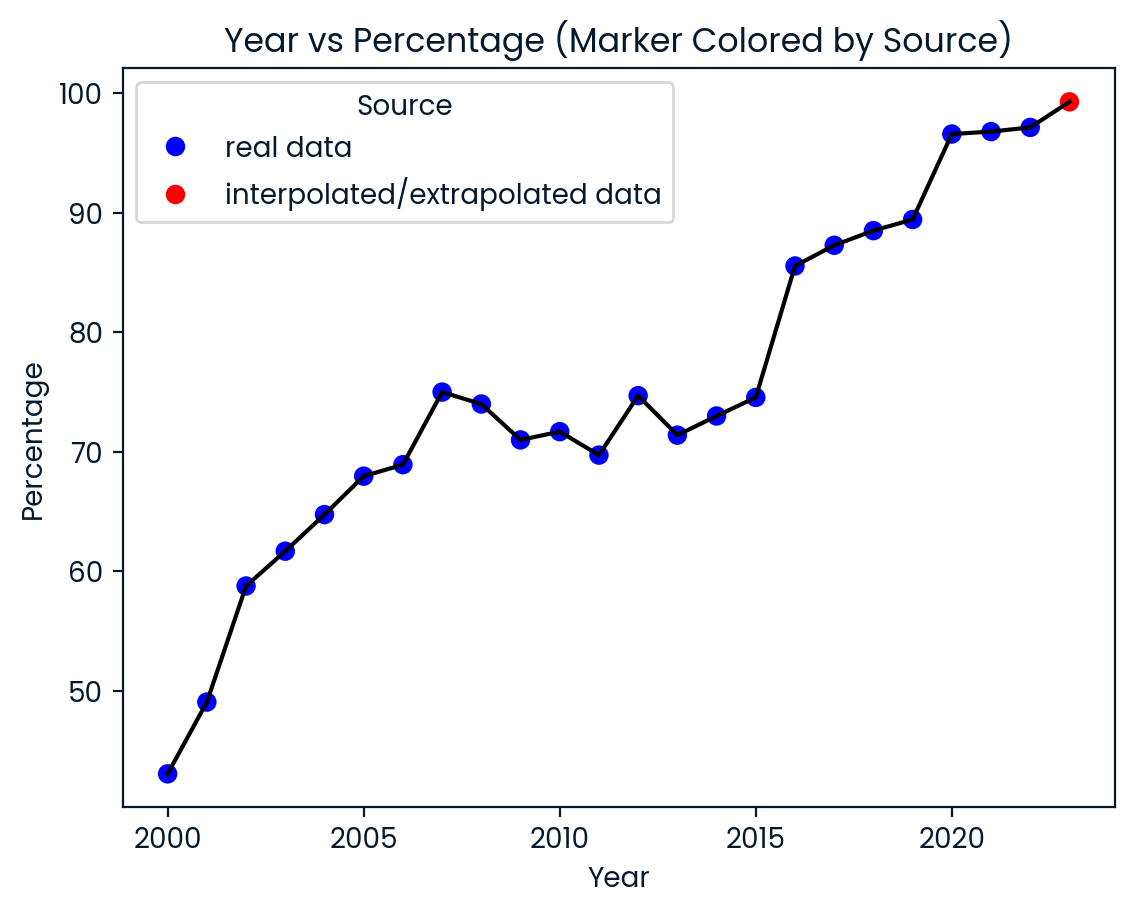

In [10]:
#Static Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
df = pd.read_csv(r"United States.csv")
color_map = {'real data': 'blue', r'interpolated/extrapolated data': 'red'}
colors = df['percentage_of_population_using_internet_data_source'].map(color_map)
plt.plot(df['year'], df['percentage_of_population_using_internet'], color='black', label='Line')
plt.scatter(df['year'], df['percentage_of_population_using_internet'], c=colors, marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Year vs Percentage (Marker Colored by Source)')
legend_handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', label=label) 
                  for label, color in color_map.items()]
plt.legend(handles=legend_handles, title="Source")
plt.show()


In [12]:
#Interactive Visualization

import numpy as np
from numpy.polynomial.polynomial import Polynomial
import plotly.graph_objects as go

coeffs = np.polyfit(df['year'], df['percentage_of_population_using_internet'], 4)
poly_eq = f"y={coeffs[0]:.2f} + {coeffs[1]:.2f}x + {coeffs[2]:.2f}x^2 + {coeffs[3]:.2f}x^3"
poly = Polynomial(coeffs[::-1])
df['poly_fit'] = poly(df['year'])

color_map = {'real data': 'blue', r'interpolated/extrapolated data': 'red'}
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['percentage_of_population_using_internet'],
    mode='lines+markers',
    marker=dict(color=[color_map[src] for src in df['percentage_of_population_using_internet_data_source']], size=7),
    line=dict(color='black'),
    name='Line with Markers'
))

fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['poly_fit'],
    mode='lines',
    line=dict(color='magenta', dash='dot'),
    name=f'3° Polynomial Fit: {poly_eq}'
))

for label, color in color_map.items():
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(color=color, size=10),
        name=label
    ))

fig.update_layout(
    title='Year vs Percentage (Marker Colored by Source)',
    xaxis_title='Year',
    yaxis_title='Percentage',
    legend_title='Source'
)
fig.show()


In [19]:
!pip install dash jupyter_dash

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [13]:
#Data Cleaning and Segmentation
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

data = pd.read_csv("access_to_electricity_percentage.csv")
data.replace('..', np.nan, inplace=True)

for i in range(2000, 2024):
    print(f'missing data in year {i}: {data[str(i)].isna().sum()}')

for country in data['Country Name'].unique():
    country_df = data[data['Country Name'] == country]
    df = country_df.melt(id_vars=['Country Name'], 
                         var_name='year', 
                         value_name='percentage_of_population_having_access_to_electricity')
    df.drop(columns='Country Name', inplace=True)
    df["year"] = pd.to_numeric(df["year"], errors='coerce')
    df['percentage_of_population_having_access_to_electricity'] = pd.to_numeric(df['percentage_of_population_having_access_to_electricity'], errors='coerce')
    df["percentage_of_population_having_access_to_electricity_data_source"] = df['percentage_of_population_having_access_to_electricity'].apply(lambda x: "real data" if not pd.isna(x) else np.nan)
    
    valid_data = df[df['percentage_of_population_having_access_to_electricity'].notna()]
    
    if len(valid_data) > 23:  # Using spline interpolation when there is few missing value
        spline = UnivariateSpline(valid_data['year'], valid_data['percentage_of_population_having_access_to_electricity'], s=0)
        df['percentage_of_population_having_access_to_electricity'] = spline(df['year'])
        method_used = "spline"
    elif len(valid_data) > 10:  # Using quadratic interpolation when there is moderate missing value as most of the data has polinomial pattern
        quadratic_interp = interp1d(valid_data['year'], valid_data['percentage_of_population_having_access_to_electricity'], kind='quadratic', fill_value="extrapolate")
        df['percentage_of_population_having_access_to_electricity'] = quadratic_interp(df['year'])
        method_used = "quadratic"
    elif len(valid_data) > 1:  # Using linear interpolation as fallback
        linear_interp = interp1d(valid_data['year'], valid_data['percentage_of_population_having_access_to_electricity'], kind='linear', fill_value="extrapolate")
        df['percentage_of_population_having_access_to_electricity'] = linear_interp(df['year'])
        method_used = "linear"
    else:
        print(f"Not enough data points for interpolation in {country}")
        method_used = "none"
    
    
    df["percentage_of_population_having_access_to_electricity_data_source"] = np.where(df["percentage_of_population_having_access_to_electricity_data_source"].isna(), "interpolated data", df["percentage_of_population_having_access_to_electricity_data_source"])
    df["percentage_of_population_having_access_to_electricity_data_source"] = np.where(df["percentage_of_population_having_access_to_electricity_data_source"] == "interpolated data", r"interpolated/extrapolated data", df["percentage_of_population_having_access_to_electricity_data_source"])
    df.to_csv(f'{country}_electricity_access.csv', index=False)
    print(f"Saved data for {country} to {country}_electricity_access.csv using {method_used} interpolation.")

    
import os
directory = os.getcwd()
combined_data = pd.DataFrame()
for file in os.listdir(directory):
    if file.endswith("_electricity_access.csv") and file != "electricity_access_217_countries.csv":  
        country_name = os.path.splitext(file)[0]  
        country_data = pd.read_csv(os.path.join(directory, file))
        country_data['Country Name'] = country_name 
        combined_data = pd.concat([combined_data, country_data], ignore_index=True)
combined_data['year']=combined_data['year'].astype('int')
combined_data.to_csv(os.path.join(directory, "electricity_aceess_217_countries.csv"), index=False)


missing data in year 2000: 6
missing data in year 2001: 6
missing data in year 2002: 5
missing data in year 2003: 5
missing data in year 2004: 5
missing data in year 2005: 5
missing data in year 2006: 5
missing data in year 2007: 3
missing data in year 2008: 3
missing data in year 2009: 2
missing data in year 2010: 2
missing data in year 2011: 2
missing data in year 2012: 2
missing data in year 2013: 2
missing data in year 2014: 2
missing data in year 2015: 2
missing data in year 2016: 2
missing data in year 2017: 2
missing data in year 2018: 2
missing data in year 2019: 2
missing data in year 2020: 2
missing data in year 2021: 2
missing data in year 2022: 2
missing data in year 2023: 217
Saved data for Afghanistan to Afghanistan_electricity_access.csv using quadratic interpolation.
Saved data for Albania to Albania_electricity_access.csv using quadratic interpolation.
Saved data for Algeria to Algeria_electricity_access.csv using quadratic interpolation.
Not enough data points for int

In [17]:
a = pd.read_csv('Afghanistan.csv')
a

,Unnamed: 0,year,percentage_of_population_using_internet,percentage_of_population_using_internet_data_source,percentage_of_population_having_access_to_electricity_x,percentage_of_population_having_access_to_electricity_data_source_x,gdp_per_capita_x,gdp_per_capita_data_source_x,urban_population_percentage_x,urban_population_percentage_data_source_x,percentage_of_population_having_access_to_electricity_y,percentage_of_population_having_access_to_electricity_data_source_y,gdp_per_capita_y,gdp_per_capita_data_source_y,urban_population_percentage_y,urban_population_percentage_data_source_y
0,0,2000,0.154120,interpolated/extrapolated data,4.400000,real data,20776.45150,real data,22.078,real data,4.400000,real data,20776.45150,real data,22.078,real data
1,1,2001,0.004723,real data,9.300000,real data,18673.98179,real data,22.169,real data,9.300000,real data,18673.98179,real data,22.169,real data
2,2,2002,0.004561,real data,14.100000,real data,22786.02811,real data,22.261,real data,14.100000,real data,22786.02811,real data,22.261,real data
3,3,2003,0.087891,real data,19.000000,real data,23320.51351,real data,22.353,real data,19.000000,real data,23320.51351,real data,22.353,real data
4,4,2004,0.105809,real data,23.800000,real data,22819.53938,real data,22.500,real data,23.800000,real data,22819.53938,real data,22.500,real data
5,5,2005,1.224150,real data,28.700000,real data,24504.39206,real data,22.703,real data,28.700000,real data,24504.39206,real data,22.703,real data
6,6,2006,2.107120,real data,33.500000,real data,24781.90064,real data,22.907,real data,33.500000,real data,24781.90064,real data,22.907,real data
7,7,2007,1.900000,real data,38.400000,real data,27679.47563,real data,23.113,real data,38.400000,real data,27679.47563,real data,23.113,real data
8,8,2008,1.840000,real data,42.400000,real data,28143.73770,real data,23.320,real data,42.400000,real data,28143.73770,real data,23.320,real data
9,9,2009,3.550000,real data,48.300000,real data,32940.52718,real data,23.528,real data,48.300000,real data,32940.52718,real data,23.528,real data


In [20]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
combined_data = pd.read_csv("internet_usage_217_countries.csv")
latest_data = combined_data.groupby("Country Name").last().reset_index()
map_fig = px.choropleth(
    latest_data,
    locations="Country Name",
    locationmode="country names",
    color="percentage_of_population_using_internet",
    title="Internet Usage Across Countries",
    color_continuous_scale="Viridis",
    range_color=[0,100]
)
def generate_line_chart(country_name):
    country_data = combined_data[combined_data["Country Name"] == country_name]
    fig = px.line(
        country_data,
        x="year",
        y="percentage_of_population_using_internet",
        color="source",
        markers=True,
        title=f"Internet Usage Over Time for {country_name}"
    )
    return fig
map_fig.update_layout(clickmode="event+select")
click_data = {"points": [{"location": "United States"}]}

if click_data:
    clicked_country = click_data["points"][0]["location"]
    line_chart = generate_line_chart(clicked_country)
    line_chart.show()
map_fig.show()

In [21]:
latest_data

,Country Name,year,percentage_of_population_using_internet,source
0,Afghanistan,2023,23.998177,interpolated/extrapolated data
1,Albania,2023,83.135600,real data
2,Algeria,2023,74.452991,interpolated/extrapolated data
3,American Samoa,2023,NaN,interpolated/extrapolated data
4,Andorra,2023,95.389162,interpolated/extrapolated data
...,...,...,...,...
212,Virgin Islands (U.S.),2023,92.983092,interpolated/extrapolated data
213,West Bank and Gaza,2023,86.637700,real data
214,"Yemen, Rep.",2023,21.778730,interpolated/extrapolated data
215,Zambia,2023,38.372405,interpolated/extrapolated data


In [28]:
!pip install jupyter_dash

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [16]:
uv = data['Country Name'].unique().tolist()
for i in uv:
    df1 = pd.read_csv(f'{i}.csv')
    df2 = pd.read_csv(f'{i}_electricity_access.csv')
    df3 = pd.read_csv(f'{i}_gdp_per_capita.csv')
    df4 = pd.read_csv(f'{i}_urban_population_percentage.csv')
    merged_df = pd.merge(df1, df2, on=['year'], how='inner')
    merged_df = pd.merge(merged_df, df3, on=['year'], how='inner')
    merged_df = pd.merge(merged_df, df4, on=['year'], how='inner')
    merged_df.drop(columns=['Unnamed: 0'], inplace=True)
    merged_df.to_csv(f'{i}.csv')

In [31]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import pandas as pd
import os
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)
import dash
from dash import dcc, html
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import plotly.graph_objects as go

# Sample data (replace with your actual DataFrame)
data = {
    'year': np.arange(2000, 2023),
    'percentage_of_population_using_internet': np.random.uniform(10, 90, 21),
    'source': ['real data'] * 15 + ['interpolated/extrapolated data'] * 6
}
df = pd.DataFrame(data)

# Polynomial Fit
coeffs = np.polyfit(df['year'], df['percentage_of_population_using_internet'], 4)
poly_eq = f"y={coeffs[0]:.2f} + {coeffs[1]:.2f}x + {coeffs[2]:.2f}x^2 + {coeffs[3]:.2f}x^3"
poly = Polynomial(coeffs[::-1])
df['poly_fit'] = poly(df['year'])

# Color mapping
color_map = {'real data': 'blue', 'interpolated/extrapolated data': 'red'}

# Create Figure
def create_figure():
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=df['year'],
        y=df['percentage_of_population_using_internet'],
        mode='lines+markers',
        marker=dict(color=[color_map[src] for src in df['source']], size=7),
        line=dict(color='black'),
        name='Line with Markers'
    ))
    
    fig.add_trace(go.Scatter(
        x=df['year'],
        y=df['poly_fit'],
        mode='lines',
        line=dict(color='magenta', dash='dot'),
        name=f'3° Polynomial Fit: {poly_eq}'
    ))
    
    for label, color in color_map.items():
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(color=color, size=10),
            name=label
        ))
    
    fig.update_layout(
        title='Year vs Percentage (Marker Colored by Source)',
        xaxis_title='Year',
        yaxis_title='Percentage',
        legend_title='Source'
    )
    
    return fig

# Dash App
app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id='poly-plot', figure=create_figure())
])

if __name__ == '__main__':
    app.run_server(debug=True)


app.run_server(mode="inline")


ValueError: All arrays must be of the same length

## ✍️ Judging criteria
| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Visualizations** | 50% | <ul><li>Appropriateness of visualizations used.</li><li>Clarity of insight from visualizations.</li></ul> |
| **Summary** | 35%       | <ul><li>Clarity of insights - how clear and well presented the findings are.</li>
| **Votes** | 15% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |
   

## 🧾 Executive summary
_In a couple of lines, write your main findings here._

## 📷 Visual/Dashboard screenshot
_Paste one screenshot of your visual/dashboard here._

## 🌐 Upload your dashboard (optional)
Ideally, paste your link to your online available dashboard here.

Otherwise, upload your dashboard file to the _Files_ section (_File_ > _Show workbook files_).

## ⌛️ Time is ticking. Good luck!